#  OMNI data introduction
Súbor: 2_data_introduction.ipynb

Program: Hospodárska informatika

Vypracovala: Bc. Veronika Motúzová

Diplomová práca: : Predikcia geomagnetickych búrok pomocou hlbokého učenia

Vedúci diplomovej práce: doc. Ing. Peter Butka, PhD.

Konzultanti: Ing. Viera Maslej Krešňáková, PhD., RNDr. Šimon Mackovjak, PhD.

pomocný zdroj: https://github.com/space-lab-sk/airglow_data-driven_model/blob/main/airglow_data_driven_modeling.ipynb

In [1]:
import numpy as np
import pandas as pd
import datetime
import math
from scipy import stats
import seaborn as sns
import matplotlib.dates as md
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

In [ ]:
plt.style.use('default')
plt.style.use('seaborn-deep')
pd.set_option("display.precision", 2)

In [2]:
df = pd.read_csv('omni_full.csv')

In [5]:
len(df)

520443

In [3]:
df = df.drop(columns=['Unnamed: 0',  'DST+1', 'DST+2',
       'DST+3', 'DST+4', 'DST+6', 'DST+8', 'DST+12', 'DST+24', 'DST+48',
       'F10_INDEX+1', 'F10_INDEX+2', 'F10_INDEX+3', 'F10_INDEX+4',
       'F10_INDEX+6', 'F10_INDEX+8', 'F10_INDEX+12', 'F10_INDEX+24',
       'F10_INDEX+48', 'BZ_GSE+1', 'BZ_GSE+2', 'BZ_GSE+3', 'BZ_GSE+4',
       'BZ_GSE+6', 'BZ_GSE+8', 'BZ_GSE+12', 'BZ_GSE+24', 'BZ_GSE+48'])

In [4]:
df.columns

Index(['time1', 'Rot$', 'IMF', 'PLS', 'IMF_PTS', 'PLS_PTS', 'ABS_B', 'F',
       'THETA_AV', 'PHI_AV', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'BY_GSM', 'BZ_GSM',
       'SIGMA$ABS_B', 'SIGMA$B', 'SIGMA$Bx', 'SIGMA$By', 'SIGMA$Bz', 'T', 'N',
       'V', 'PHI$V', 'THETA$V', 'Ratio', 'Pressure', 'SIGMA$T', 'SIGMA$N',
       'SIGMA$V', 'SIGMA$PHI$V', 'SIGMA$THETA$V', 'SIGMA$ratio', 'E', 'Beta',
       'Mach_num', 'Mgs_mach_num', 'PR$FLX_1', 'PR$FLX_2', 'PR$FLX_4',
       'PR$FLX_10', 'PR$FLX_30', 'PR$FLX_60', 'MFLX', 'R', 'F10_INDEX', 'KP',
       'DST', 'AE', 'AP_INDEX', 'AL_INDEX', 'AU_INDEX', 'PC_N_INDEX',
       'Solar_Lyman_alpha', 'Proton_QI'],
      dtype='object')

In [9]:
df.isna().sum()

time1                     0
Rot$                      0
IMF                       0
PLS                       0
IMF_PTS                   0
PLS_PTS                   0
ABS_B                124067
F                    124067
THETA_AV             124067
PHI_AV               124067
BX_GSE               124067
BY_GSE               124067
BZ_GSE               124067
BY_GSM               124093
BZ_GSM               124093
SIGMA$ABS_B          141086
SIGMA$B              124223
SIGMA$Bx             124622
SIGMA$By             124609
SIGMA$Bz             124606
T                    161020
N                    144145
V                    127822
PHI$V                159323
THETA$V              194992
Ratio                228207
Pressure             144153
SIGMA$T              164786
SIGMA$N              165563
SIGMA$V              159753
SIGMA$PHI$V          174407
SIGMA$THETA$V        208894
SIGMA$ratio          228207
E                    151606
Beta                 176713
Mach_num            

In [10]:
df.shape

(520443, 55)

In [11]:
df.describe()

,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,BX_GSE,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
count,520443.00,520443.00,520443.00,520443.00,520443.00,396376.00,396376.00,396376.00,396376.00,396376.00,...,519920.00,520443.00,520443.00,520443.00,520443.00,520443.00,520443.00,402961.00,5.20e+05,3.60e+05
mean,2177.09,58.95,61.95,322.01,294.32,6.12,5.44,-0.24,202.77,0.03,...,116.49,20.95,-14.13,1403.02,12.99,17225.35,17394.54,1.05,7.32e-03,2.30e-02
std,299.21,26.61,25.59,427.23,432.93,3.15,3.03,28.68,101.29,3.66,...,48.00,14.30,22.03,3221.37,29.83,37898.44,37820.78,1.40,1.13e-03,4.10e-02
min,1771.00,1.00,1.00,1.00,1.00,0.40,0.10,-89.70,-90.00,-40.80,...,63.40,0.00,-589.00,3.00,0.00,-2740.00,-529.00,-21.50,5.65e-03,1.00e-04
25%,1972.00,50.00,50.00,57.00,24.00,4.10,3.50,-18.20,123.30,-2.70,...,75.80,10.00,-22.00,60.00,4.00,-145.00,31.00,0.10,6.33e-03,9.10e-03
50%,2173.00,51.00,52.00,60.00,36.00,5.40,4.80,0.00,183.70,0.10,...,100.90,20.00,-10.00,152.00,7.00,-42.00,72.00,0.70,7.04e-03,1.51e-02
75%,2374.00,71.00,97.00,999.00,999.00,7.30,6.50,17.90,303.10,2.70,...,145.40,30.00,-1.00,405.00,15.00,-11.00,181.00,1.60,8.08e-03,2.54e-02
max,9999.00,99.00,99.00,999.00,999.00,62.00,60.70,90.00,360.00,34.80,...,367.00,99.00,81.00,9999.00,999.00,99999.00,99999.00,28.30,1.12e-02,3.28e+00


In [12]:
df.head()

,time1,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
0,1963-01-01 01:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,7.0,-5.0,143.0,3.0,99999.0,99999.0,NaN,6.19e-03,NaN
1,1963-01-01 02:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,7.0,-5.0,66.0,3.0,99999.0,99999.0,NaN,6.19e-03,NaN
2,1963-01-01 03:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,20.0,-3.0,51.0,7.0,99999.0,99999.0,NaN,6.19e-03,NaN
3,1963-01-01 04:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,20.0,-3.0,95.0,7.0,99999.0,99999.0,NaN,6.19e-03,NaN
4,1963-01-01 05:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,20.0,-6.0,57.0,7.0,99999.0,99999.0,NaN,6.19e-03,NaN


In [13]:
df.tail()

,time1,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
520438,2022-05-13 12:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,2.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN
520439,2022-05-13 13:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,4.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN
520440,2022-05-13 14:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,5.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN
520441,2022-05-13 15:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,5.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN
520442,2022-05-13 16:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,4.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN


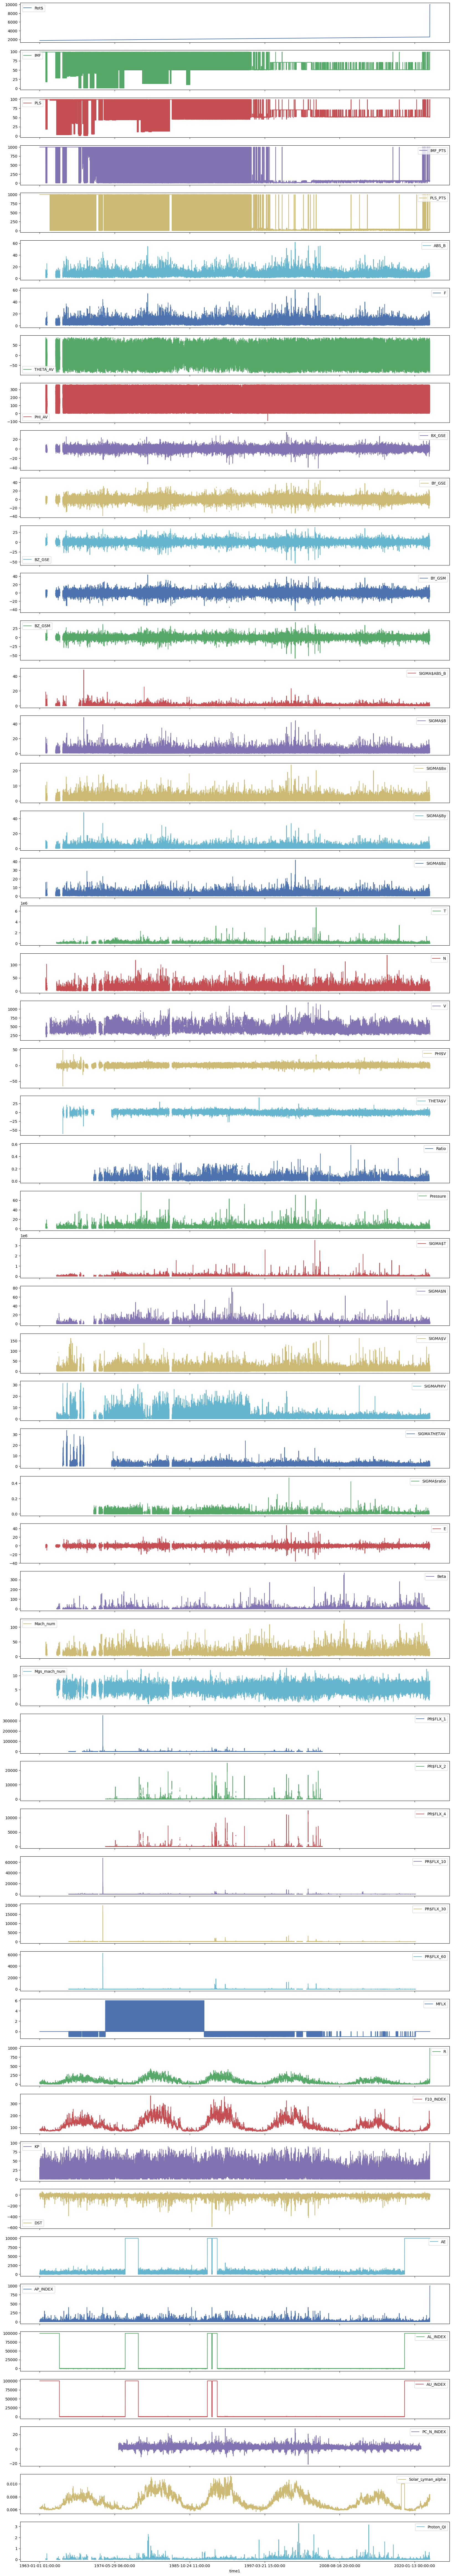

In [42]:
# quick view of data in main data frames
df.plot('time1',subplots=True, figsize=(20,120))
plt.show()

In [ ]:
cor = df.corr(method='pearson').iloc[46:47, 1:]

In [ ]:
attr = df.columns.tolist()

In [30]:
row_list = cor.loc[:, :].values.flatten().tolist()
print(row_list)

[-0.04461822823948587, -0.04621273045084821, -0.04482768847725404, -0.07300712125704159, -0.34347478659370584, -0.3296141972875764, 0.17144719350281262, -0.0025844436813247497, -0.0028955861685132918, -0.010643923589289098, 0.2248265925458979, -0.00954365072239218, 0.2934562444623613, -0.03984593522821468, -0.1669997178169469, -0.13275855284930002, -0.1456710014567723, -0.15154740852291562, -0.3022513475811367, 0.21350037367655192, -0.4434586328455424, -0.1424811699527626, -0.04934056447125717, -0.2863769947099561, -0.1050885761847492, -0.21406010605813966, 0.052666717964987994, -0.24589824167150143, -0.11193623741670544, -0.19390883899030023, -0.16484698899136038, -0.2907458974421127, 0.2060899891801186, 0.2604447082714141, 0.14272048030737536, -0.07870730192991558, -0.1067912810898054, -0.0877167537406271, -0.04440550059884655, -0.034564079896720036, -0.045378015914688805, -0.027568116294728884, -0.18237367347319355, -0.2164869655116761, -0.5803892189122427, 1.0, 0.006666533648850818

In [33]:
df = pd.concat([pd.Series(attr), pd.Series(row_list)], axis=1)

In [34]:
print(df)

                    0         1
0               time1 -4.46e-02
1                Rot$ -4.62e-02
2                 IMF -4.48e-02
3                 PLS -7.30e-02
4             IMF_PTS -3.43e-01
5             PLS_PTS -3.30e-01
6               ABS_B  1.71e-01
7                   F -2.58e-03
8            THETA_AV -2.90e-03
9              PHI_AV -1.06e-02
10             BX_GSE  2.25e-01
11             BY_GSE -9.54e-03
12             BZ_GSE  2.93e-01
13             BY_GSM -3.98e-02
14             BZ_GSM -1.67e-01
15        SIGMA$ABS_B -1.33e-01
16            SIGMA$B -1.46e-01
17           SIGMA$Bx -1.52e-01
18           SIGMA$By -3.02e-01
19           SIGMA$Bz  2.14e-01
20                  T -4.43e-01
21                  N -1.42e-01
22                  V -4.93e-02
23              PHI$V -2.86e-01
24            THETA$V -1.05e-01
25              Ratio -2.14e-01
26           Pressure  5.27e-02
27            SIGMA$T -2.46e-01
28            SIGMA$N -1.12e-01
29            SIGMA$V -1.94e-01
30      

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt

/tmp/ipykernel_76/3087633769.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(method='pearson').iloc[46:47, 1:])


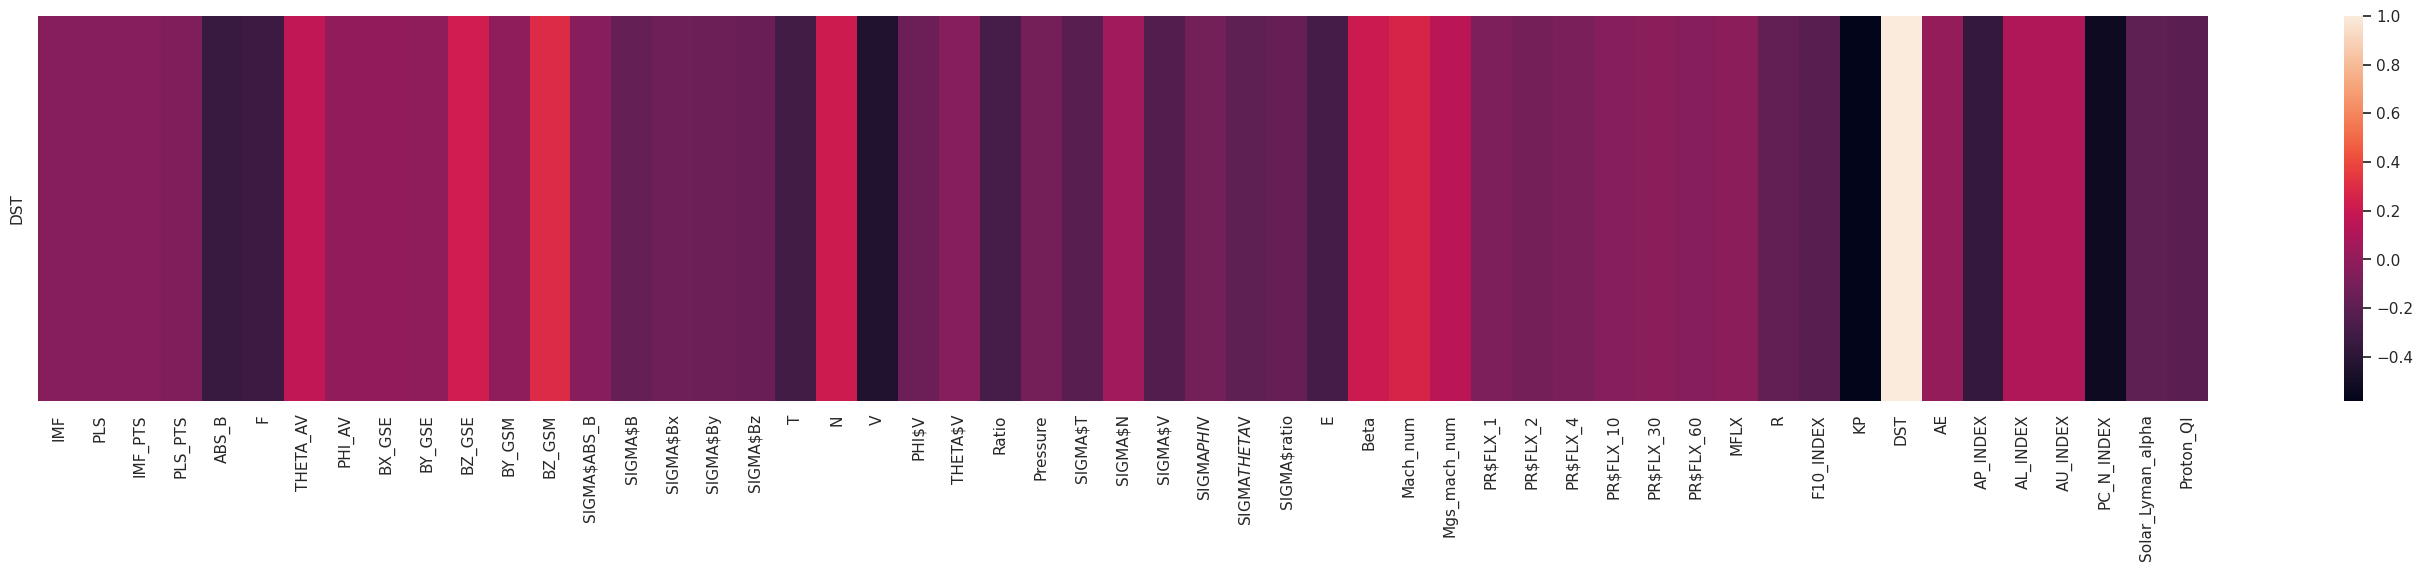

In [46]:
sn.set(rc = {'figure.figsize':(35,5)})
sn.heatmap(df.corr(method='pearson').iloc[46:47, 1:])
plt.show()
# najv. korel. : THETA_AV, BZ_GSE, BZ_GSM,N, Beta, Mach_num, Mgs_mach_num, ABS_B, F, T, V, E, KP, AP_INDEX, PC_N_INDEX

In [17]:
df.corr(method='pearson')

,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,BX_GSE,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
Rot$,1.00e+00,-4.78e-02,-1.46e-01,-3.93e-01,-3.51e-01,-1.61e-01,-1.49e-01,-9.03e-03,-1.78e-02,-1.63e-02,...,-1.29e-01,-3.75e-02,4.32e-02,2.02e-01,4.60e-01,4.78e-03,4.51e-03,-8.04e-02,-3.75e-02,-5.01e-02
IMF,-4.78e-02,1.00e+00,6.21e-01,7.04e-01,4.26e-01,-4.32e-02,-4.31e-02,6.14e-05,-7.65e-03,-4.29e-03,...,-9.00e-02,5.76e-02,-4.46e-02,4.48e-02,5.62e-02,1.73e-01,1.73e-01,4.16e-02,-8.38e-02,-2.74e-02
PLS,-1.46e-01,6.21e-01,1.00e+00,5.78e-01,6.79e-01,-6.86e-03,-8.98e-03,-1.78e-03,-4.06e-03,1.11e-03,...,-2.98e-02,5.61e-02,-4.62e-02,-4.19e-02,2.92e-02,9.39e-02,9.41e-02,4.49e-02,-3.66e-02,-2.70e-02
IMF_PTS,-3.93e-01,7.04e-01,5.78e-01,1.00e+00,6.64e-01,1.39e-04,-8.81e-03,4.33e-04,2.54e-02,1.71e-02,...,3.42e-02,9.21e-02,-4.48e-02,-3.77e-02,6.86e-02,1.22e-01,1.23e-01,5.17e-02,-1.36e-02,1.47e-02
PLS_PTS,-3.51e-01,4.26e-01,6.79e-01,6.64e-01,1.00e+00,7.25e-02,7.10e-02,1.18e-03,7.93e-03,3.35e-03,...,1.06e-01,1.03e-01,-7.30e-02,-8.04e-02,4.78e-02,8.66e-02,8.69e-02,6.01e-02,6.76e-02,3.71e-02
ABS_B,-1.61e-01,-4.32e-02,-6.86e-03,1.39e-04,7.25e-02,1.00e+00,9.63e-01,1.08e-02,5.28e-04,1.16e-03,...,2.94e-01,5.46e-01,-3.43e-01,-7.42e-02,5.48e-01,-1.06e-01,-1.04e-01,3.66e-01,2.69e-01,4.28e-01
F,-1.49e-01,-4.31e-02,-8.98e-03,-8.81e-03,7.10e-02,9.63e-01,1.00e+00,1.43e-02,1.84e-03,1.86e-03,...,2.92e-01,4.60e-01,-3.30e-01,-6.88e-02,4.76e-01,-9.68e-02,-9.50e-02,3.20e-01,2.68e-01,4.57e-01
THETA_AV,-9.03e-03,6.14e-05,-1.78e-03,4.33e-04,1.18e-03,1.08e-02,1.43e-02,1.00e+00,-8.85e-03,3.73e-03,...,9.04e-03,-2.60e-01,1.71e-01,-2.57e-02,-2.03e-01,1.48e-04,-1.93e-03,-4.46e-01,5.09e-03,2.70e-03
PHI_AV,-1.78e-02,-7.65e-03,-4.06e-03,2.54e-02,7.93e-03,5.28e-04,1.84e-03,-8.85e-03,1.00e+00,4.05e-01,...,-7.55e-03,-7.42e-03,-2.58e-03,1.16e-02,-1.42e-02,1.56e-02,1.55e-02,-2.37e-02,-2.68e-03,8.09e-03
BX_GSE,-1.63e-02,-4.29e-03,1.11e-03,1.71e-02,3.35e-03,1.16e-03,1.86e-03,3.73e-03,4.05e-01,1.00e+00,...,-1.36e-02,-7.17e-03,-2.90e-03,6.86e-03,-1.24e-02,1.09e-02,1.08e-02,-3.89e-03,-4.86e-03,-1.49e-03


In [21]:
print(df.corr())

                       Rot$       IMF       PLS   IMF_PTS   PLS_PTS     ABS_B  \
Rot$               1.00e+00 -4.78e-02 -1.46e-01 -3.93e-01 -3.51e-01 -1.61e-01   
IMF               -4.78e-02  1.00e+00  6.21e-01  7.04e-01  4.26e-01 -4.32e-02   
PLS               -1.46e-01  6.21e-01  1.00e+00  5.78e-01  6.79e-01 -6.86e-03   
IMF_PTS           -3.93e-01  7.04e-01  5.78e-01  1.00e+00  6.64e-01  1.39e-04   
PLS_PTS           -3.51e-01  4.26e-01  6.79e-01  6.64e-01  1.00e+00  7.25e-02   
ABS_B             -1.61e-01 -4.32e-02 -6.86e-03  1.39e-04  7.25e-02  1.00e+00   
F                 -1.49e-01 -4.31e-02 -8.98e-03 -8.81e-03  7.10e-02  9.63e-01   
THETA_AV          -9.03e-03  6.14e-05 -1.78e-03  4.33e-04  1.18e-03  1.08e-02   
PHI_AV            -1.78e-02 -7.65e-03 -4.06e-03  2.54e-02  7.93e-03  5.28e-04   
BX_GSE            -1.63e-02 -4.29e-03  1.11e-03  1.71e-02  3.35e-03  1.16e-03   
BY_GSE             1.33e-02  9.09e-03  4.80e-03 -3.33e-02 -5.86e-03  2.67e-02   
BZ_GSE            -3.09e-03 

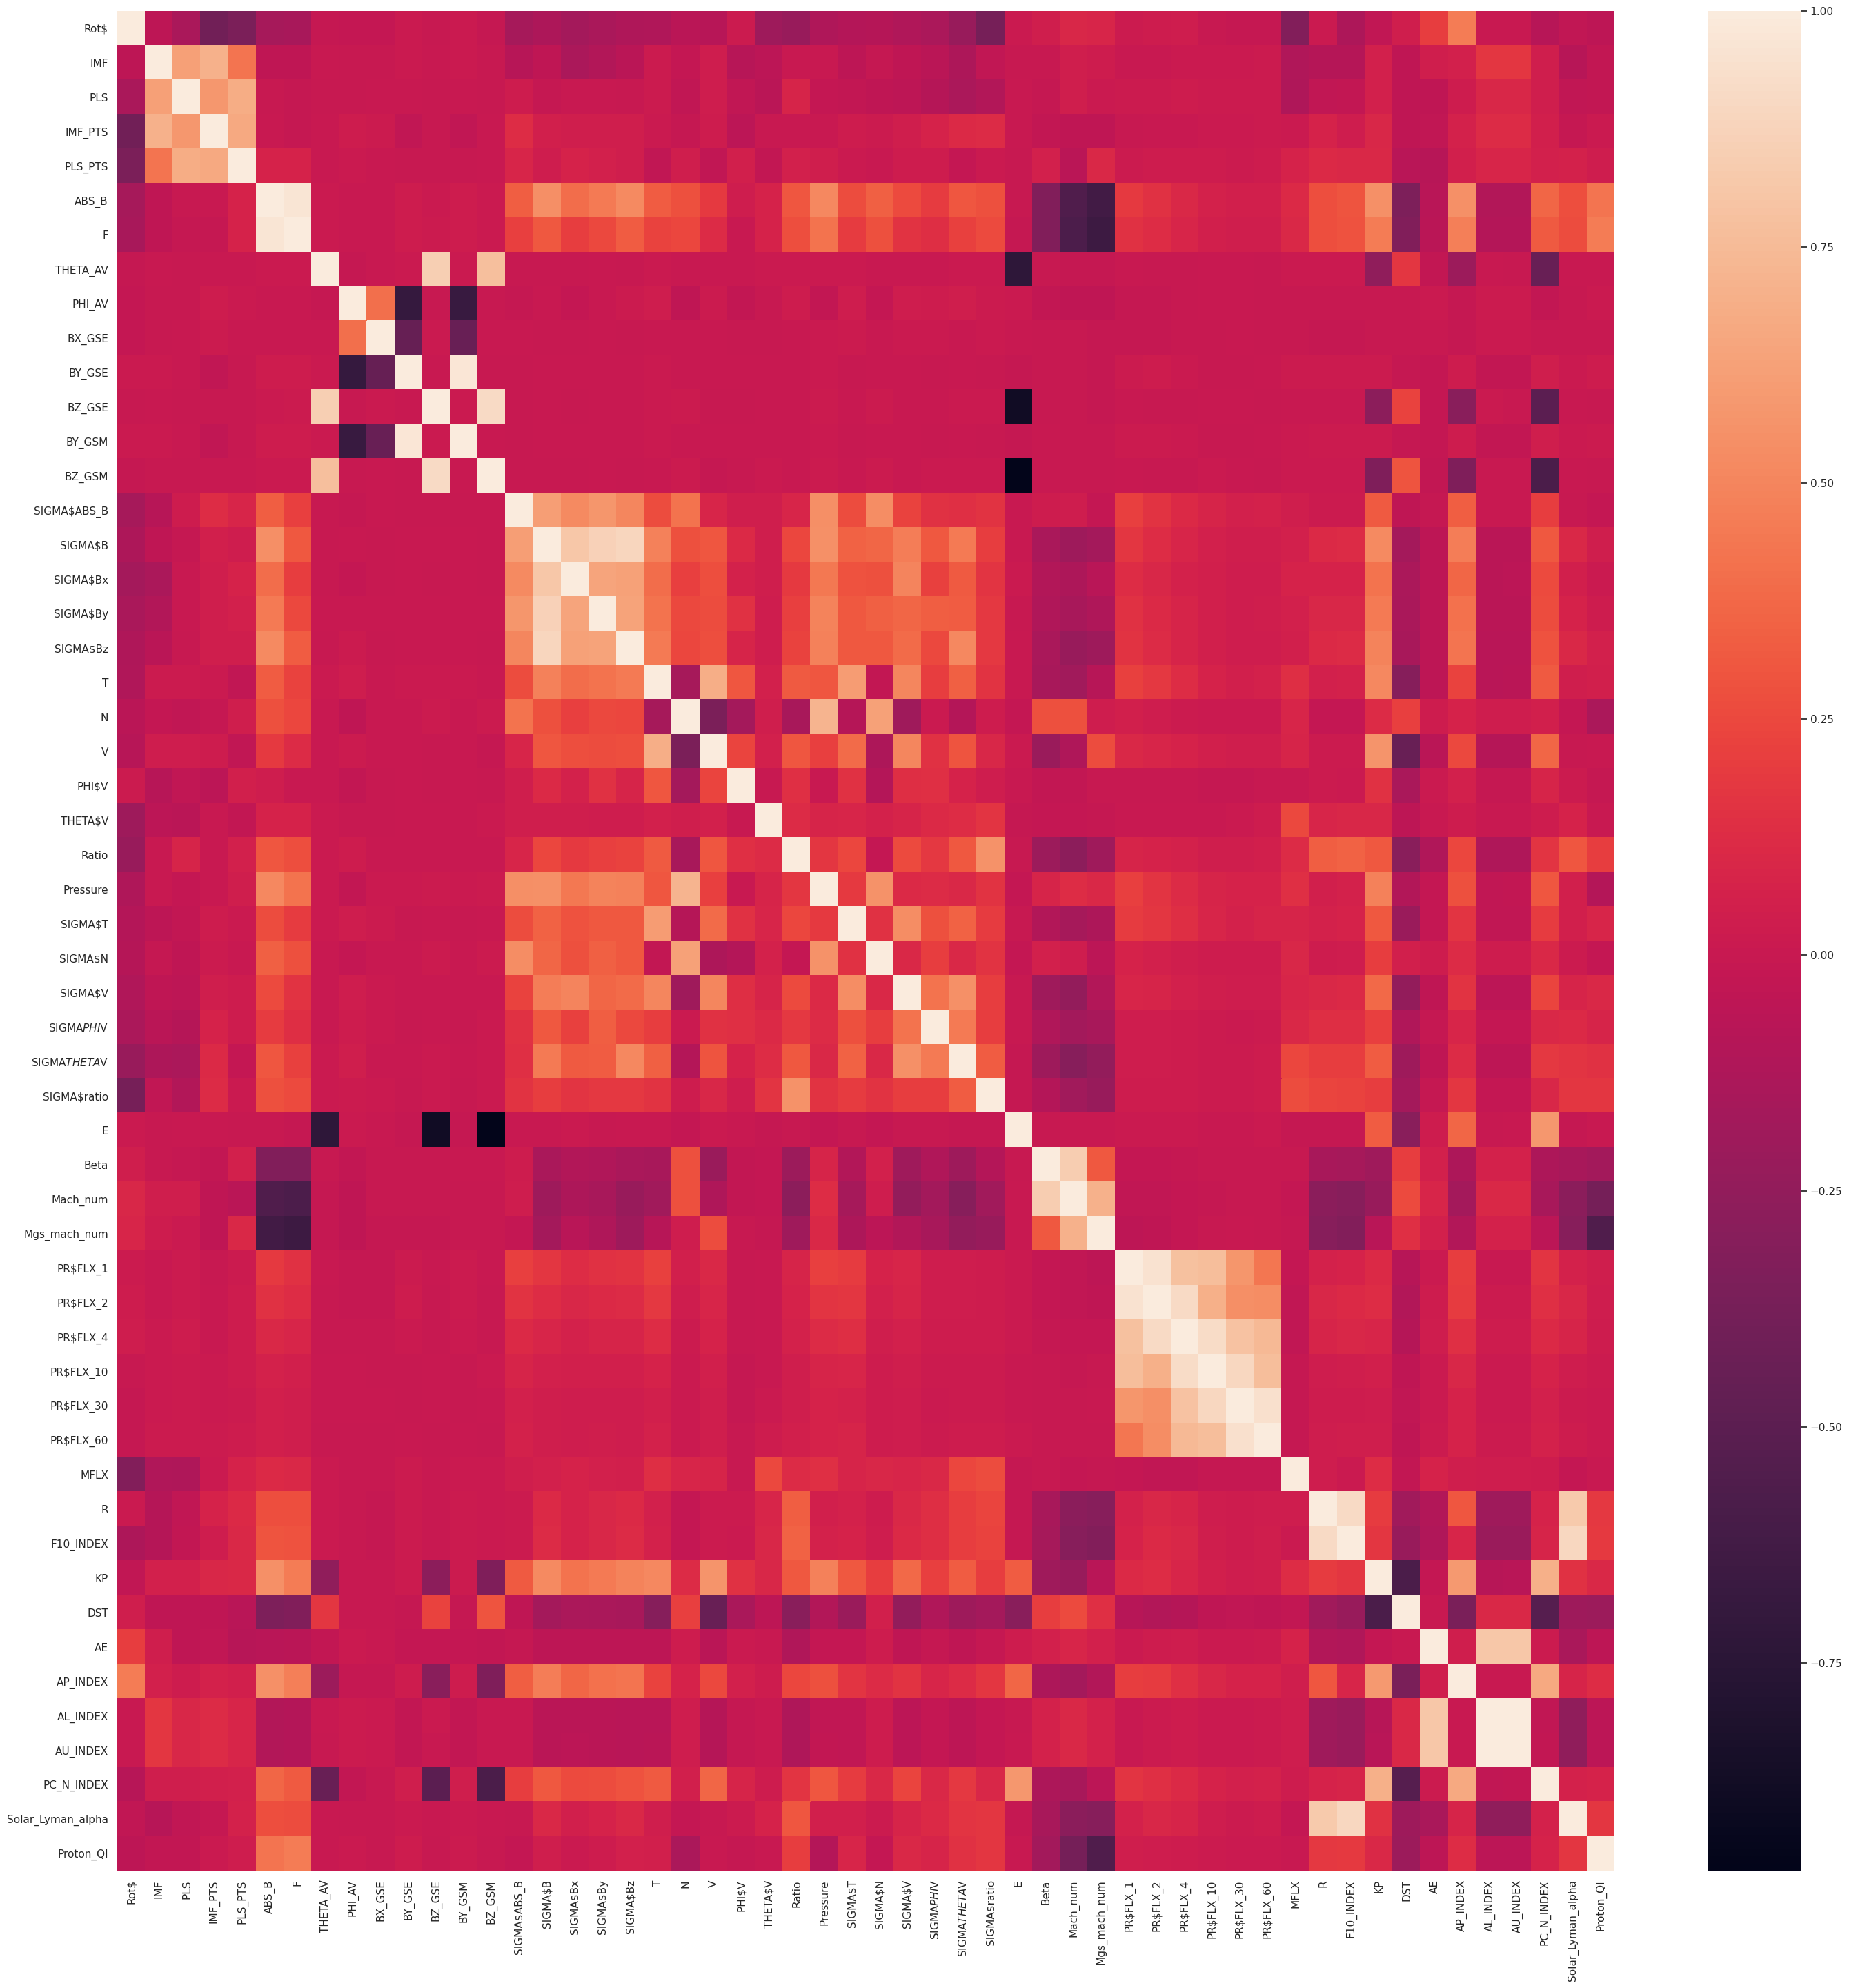

In [76]:
sn.set(rc = {'figure.figsize':(35,35)})
sn.heatmap(df.corr(method='pearson'))
plt.show()

In [33]:
features = ['time1', 
            'E',
            'Solar_Lyman_alpha',
            'IMF',
            'IMF_PTS',
            'BZ_GSE',
            'BZ_GSM',
            'DST',
            'F10_INDEX']

# Šimon chcel skúsiť tieto features: electron density, solar wind velocity, IMF magnetic field vector, Bz, Dst, clock angle, F10.7]

In [35]:
df_1=df[features]

In [37]:
df_1.columns

Index(['time1', 'E', 'Solar_Lyman_alpha', 'IMF', 'IMF_PTS', 'BZ_GSE', 'BZ_GSM',
       'DST', 'F10_INDEX'],
      dtype='object')

In [44]:
df_1.corr(method='pearson')

,E,Solar_Lyman_alpha,IMF,IMF_PTS,BZ_GSE,BZ_GSM,DST,F10_INDEX
E,1.00e+00,-1.04e-02,-5.25e-04,-1.37e-05,-8.83e-01,-9.70e-01,-0.29,-1.56e-02
Solar_Lyman_alpha,-1.04e-02,1.00e+00,-8.38e-02,-1.36e-02,4.03e-03,7.19e-03,-0.20,8.99e-01
IMF,-5.25e-04,-8.38e-02,1.00e+00,7.04e-01,1.92e-03,-2.99e-03,-0.04,-9.00e-02
IMF_PTS,-1.37e-05,-1.36e-02,7.04e-01,1.00e+00,-4.48e-03,1.76e-03,-0.04,3.42e-02
BZ_GSE,-8.83e-01,4.03e-03,1.92e-03,-4.48e-03,1.00e+00,9.10e-01,0.22,4.63e-03
BZ_GSM,-9.70e-01,7.19e-03,-2.99e-03,1.76e-03,9.10e-01,1.00e+00,0.29,1.16e-02
DST,-2.91e-01,-1.97e-01,-4.46e-02,-4.48e-02,2.25e-01,2.93e-01,1.00,-2.16e-01
F10_INDEX,-1.56e-02,8.99e-01,-9.00e-02,3.42e-02,4.63e-03,1.16e-02,-0.22,1.00e+00


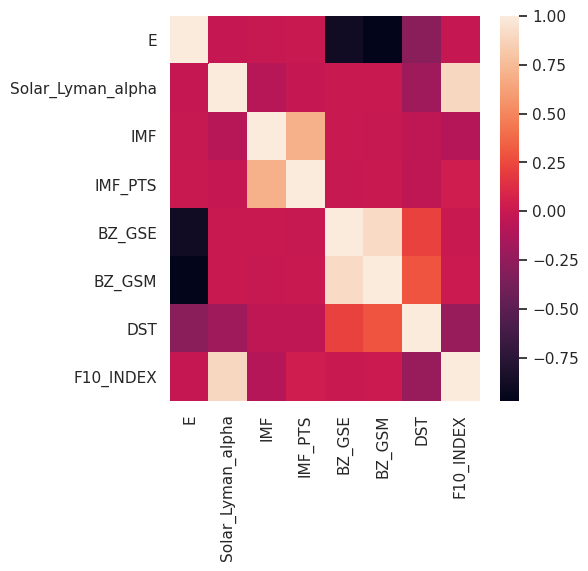

In [78]:
sn.set(rc = {'figure.figsize':(5,5)})
sn.heatmap(df_1.corr(method='pearson'))
plt.show()

In [82]:
features_2 = ['ABS_B', 
            'F',
            'N',
            'T',
            'Mach_num',
            'BZ_GSM',
            'Ratio',
            'V',
            'Beta',
            'E',
            'DST']

In [83]:
df_2=df[features_2]

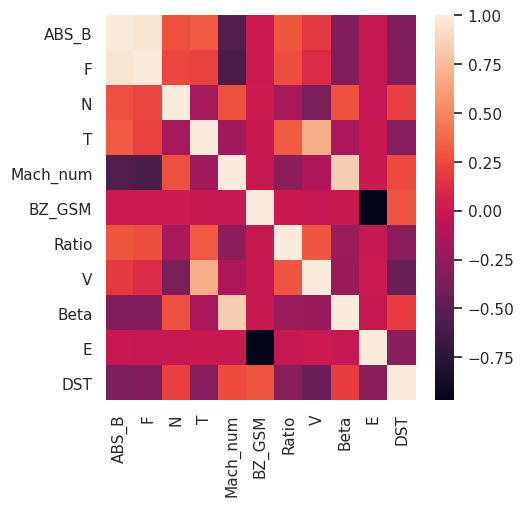

In [84]:
sn.set(rc = {'figure.figsize':(5,5)})
sn.heatmap(df_2.corr(method='pearson'))
plt.show()

In [92]:
features_3 = ['time1','THETA_AV', 'BZ_GSE', 'BZ_GSM','N', 'Beta', 'Mach_num', 'Mgs_mach_num', 'ABS_B', 'F', 'T', 'V', 'E', 'KP', 'AP_INDEX']
#, 'PC_N_INDEX' veľa chýbajúcich hodnôt

In [93]:
df_3=df[features_3]

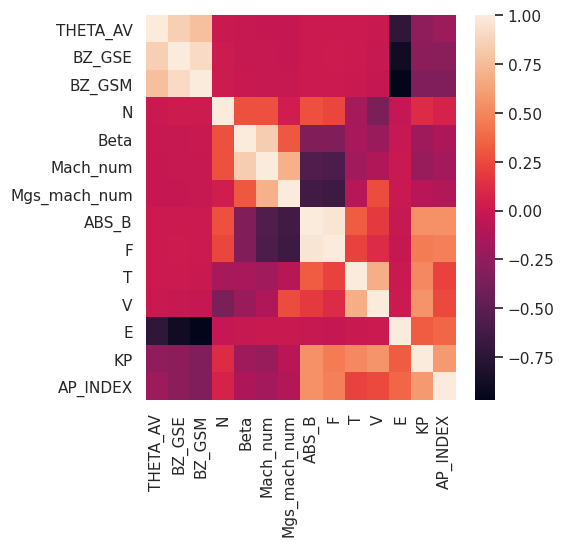

In [94]:
sn.set(rc = {'figure.figsize':(5,5)})
sn.heatmap(df_3.corr(method='pearson'))
plt.show()

In [ ]:
df_3.plot('time1',subplots=True, figsize=(40,80))
plt.show()